In [36]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame= False)
# This dataset is pretty big so some codes might take lil bit time
# WARNING: Alot of comments ahead

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
 X, y = mnist["data"], mnist["target"]

In [5]:
print(type(X))  # Nice numpy is always nice

<class 'numpy.ndarray'>


In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

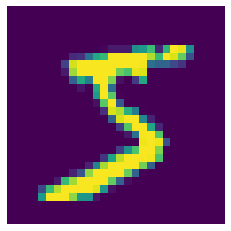

In [55]:
# As stated in the DESCR each image is 28x28 pixels
# We can try to plot a digit now
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image)
plt.axis("off")
plt.show() # Don't really need this in jupyter

In [9]:
print(some_digit_image)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

In [10]:
import numpy as np
print(type(y[0]))
# We gotta convert it to int
y = y.astype('int')

<class 'str'>


In [11]:
# So according to DESCR the dataset it already split, so we don't need to do a train test split ✌️
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [12]:
# Am gonna use some cross-validation folds in this code, that's just creating tinier train and validation sets
# The dataset is already shuffled toh like achi baat hai

# Training a Binary Classifier

In [13]:
# So like first thing I am gonna train a binary classifier
# Cause why not
# Also training a bigger one in a single attempt seems a bit tough to me
# So this classifier is going to differentiate between fives and non fives

In [14]:
# So our training data is going to be the same
# But like our labels just gonna be true or false
# true for when its a five and false otherwise
y_train_5 = ( y_train == 5 )
print(y_train_5) # Voila
y_test_5 = ( y_test == 5 )

[ True False False ...  True False False]


In [15]:
from sklearn.linear_model import SGDClassifier # Stochastic gradient descent classifier
# Its good for online learning
# ASK: It's working and how it varies wrt the normal gradient descent strategy taught in class ?
sgd_classifier = SGDClassifier(random_state = 42) # so results can be resiprocates
# Imported an instance now we train it
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [16]:
# Let's predict it now
print(sgd_classifier.predict([some_digit]))
print(y[0])
# Yesthe classifier correctly indentifies the 5

[ True]
5


In [18]:
# Now we trained a binary classifier 
# Now we are going to test it's accuracy

# First let's jus see how many correct predictions it makes

In [31]:
from sklearn.model_selection import StratifiedKFold # splits the dataset into stratified folds for cross-validation
from sklearn.base import clone # this is used to clone other model keeping parameters and throwing away the data

# now first we split our training data into train and validation
# also cross validation cause nai toh poora dataset use nai hoga
# Setting a random_state has no effect since shuffle is False. 
# You should leave random_state to its default (None), or set shuffle=True.
strat_k_folds = StratifiedKFold(n_splits = 5) # try three training phases

for train_indices, test_indices in strat_k_folds.split(X_train, y_train_5):
    # now we clone our gradient descent model, jus the model tho not its fits and estimates
    clone_classifier = clone(sgd_classifier)
    
    # Don't use our actual test case here, jus the train is split 
    X_train_folds, y_train_folds = X_train[train_indices], y_train_5[train_indices]
    X_test_folds, y_test_folds = X_train[test_indices], y_train_5[test_indices]
    
    # training it now
    clone_classifier.fit(X_train_folds, y_train_folds)
    answers = clone_classifier.predict(X_test_folds)
    correct = np.sum(answers == y_test_folds)
    print(correct/len(y_test_folds))
    # Accuracy is pretty good

0.9546666666666667
0.96975
0.9635
0.9653333333333334
0.9484166666666667


In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier, X_train, y_train_5, cv=5, scoring='accuracy') # this does the same thing 
# It uses 5 fold cross validation by default too 

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

In [33]:
# The accuracy above isn't that accurate of a measure 
# That's because only like 10% os the images are fives
# We'll get a 90% accuracy even if we predict them all as non-fives
# So like in case of classification we can't predict a model just based on the correct predictions

# Confusion MATRIX

In [34]:
# Like cross_val_score returns a score on each cross validation
# cross_val_predict returns the predictions for each fold
def conf_two(actual, predicted, ret_precision = False): # confusion matrix but just for two
    true_positives = (actual&predicted).sum()
    true_negatives = (~actual&~predicted).sum()
    false_negatives = (actual&~predicted).sum()
    false_positives = (~actual&predicted).sum()
    precision = true_positives/(true_positives + false_positives)
    if ret_precision:
        return np.array([[true_negatives, false_positives],[false_negatives, true_positives]]), precision
    return np.array([[true_negatives, false_positives],[false_negatives, true_positives]])


In [35]:
# Now we are goign to use cross validation on our confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv = 5)
# Ok so what cross_val_score is gonna do is its gonna split tis dataset into 5 parts
# then taking each part as the test_set its gonna predict 
# then its gonna group all these tes_sets to give us back the total predictions

In [41]:
print(y_train_pred.shape)

(60000,)


In [42]:
print(conf_two(y_train_5, y_train_pred))

[[53115  1464]
 [  916  4505]]


In [43]:
conf_mat_5 = conf_two(y_train_5, y_train_pred)

In [67]:
def ret_precision(conf_matrix):
    TP = conf_matrix[1][1]
    FP = conf_matrix[0][1]
    return TP/(TP + FP)

def ret_recall(conf_matrix):
    TP = conf_matrix[1][1]
    FN = conf_matrix[1][0]
    return TP/(TP + FN)

precision = ret_precision(conf_mat_5)
# We can't really use precision alone tho 
# cause we can jus lower it down by making only those preds we're extremely sure about
recall = ret_recall(conf_mat_5) # low recall good for medical tests

In [68]:
print('Precision :- ',precision)
print('Recall :- ',recall)

Precision :-  0.7547327860613168
Recall :-  0.8310274857037447


In [50]:
# Can also use the sklearn ones
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred)) 
print(recall_score(y_train_5, y_train_pred))
# Now the classifier looks a bit nice than it did a while ago

0.7547327860613168
0.8310274857037447


In [53]:
f1_score = 2*precision*recall/(precision + recall)
print(f1_score) # f1_score is high iff both recall and precision are high

0.791044776119403


In [54]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred) # could do this too

0.791044776119403

In [58]:
# Increasing precision reduces recall and vice versa
# SGD classifier makes it decisions based ona threshold 
# It evaluates a value for each instance and decides wheter it passes or fails the threshold based on that value
# We can increase the precision by increasing the threshold
# An we can increare the recall by lowering the threshold
# the sgd classifier provides us with th decision scores on its own 
y_score = sgd_classifier.decision_function([some_digit])

In [59]:
y_scores = sgd_classifier.decision_function(X_train)

In [70]:
y_scores.max()
y_pred_1000 = y_scores > 1000
y_pred_5000 = y_scores > 5000
y_pred_8000 = y_scores > 8000
conf_1000 = conf_two(y_train_5, y_pred_1000)
conf_5000 = conf_two(y_train_5, y_pred_5000)
conf_8000 = conf_two(y_train_5, y_pred_8000)
print("When threshold is 1000 - ", ret_precision(conf_1000), ret_recall(conf_1000))
print("When threshold is 5000 - ", ret_precision(conf_5000), ret_recall(conf_5000))
print("When threshold is 8000 - ", ret_precision(conf_8000), ret_recall(conf_8000))

When threshold is 1000 -  0.8045017244508985 0.8175613355469471
When threshold is 5000 -  0.9754335260115607 0.37354731599335916
When threshold is 8000 -  0.9872340425531915 0.1283895960154953


In [72]:
 y_scores = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=5, method="decision_function")

In [73]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [76]:
for i in range(10):
    print(precisions[i], recalls[i], thresholds[i])

0.09046760789025733 1.0 -71657.12621733555
0.09045242903155822 0.9998155321896329 -71564.61915860699
0.09045393858477971 0.9998155321896329 -71564.4603085297
0.09045544818838766 0.9998155321896329 -71507.89877522008
0.0904569578423846 0.9998155321896329 -71416.5310232128
0.09045846754677303 0.9998155321896329 -71299.32999591934
0.09045997730155551 0.9998155321896329 -71239.74984816364
0.09046148710673454 0.9998155321896329 -70957.26500222678
0.09046299696231265 0.9998155321896329 -70746.6290822518
0.09046450686829235 0.9998155321896329 -70718.58335690205


In [85]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend()

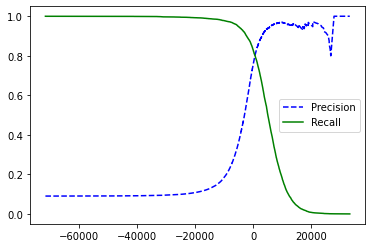

In [86]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

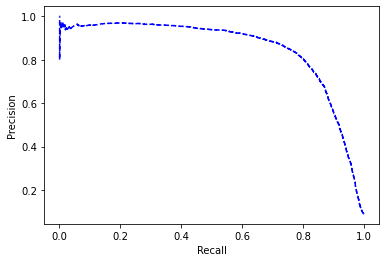

In [90]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [94]:
# We can first try and aim for more than 90% precision 
# so like uske liye threshold dhoondhna padega
reqd_index = np.argmax(precisions >= 0.90)
reqd_threshold = thresholds[reqd_index]

In [95]:
print(reqd_threshold)

3045.925822705365


In [96]:
y_train_pred_90 = (y_scores > reqd_threshold)

In [97]:
conf_matrix_90precision = conf_two(y_train_5, y_train_pred_90)
print(ret_precision(conf_matrix_90precision), ret_recall(conf_matrix_90precision))
# the recall is pretty low tbh
# like we don't want our classifier to just skip over alot of the fives

0.9001764557600201 0.6587345508208817


0.829320806420043 0.7815901125253644 1098.2252043841559


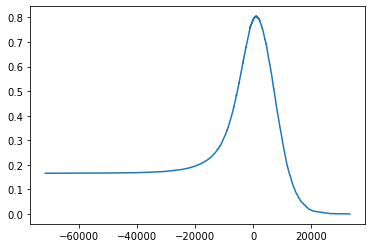

In [118]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
f1_scores = 2*precisions*recalls/(precisions + recalls)
plt.plot(thresholds, f1_scores[:-1])
# It reaches max f1_score for a threshold of zero I'm guessing, mightve been offset ? 
f1_max = np.argmax(f1_scores)
print(precisions[f1_max], recalls[f1_max], thresholds[f1_max])

In [112]:
print(recalls.shape,precisions.shape,thresholds.shape)

(59923,) (59923,) (59922,)


# ROC curve

In [99]:
# ROC curve plots TPR (recall(sensitivity)) against FPR( 1- TNR(specificity)), for different values of threshold
from sklearn.metrics import roc_curve
FPR, TPR, thresholds = roc_curve(y_train_5, y_scores)

In [102]:
def plot_roc_curve(FPR, TPR, label = None):
    plt.plot(FPR, TPR, linewidth = 2, label = label)
    plt.plot([0,1],[0,1],'k--')

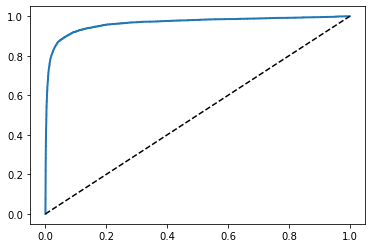

In [103]:
plot_roc_curve(FPR, TPR)
plt.show()

In [105]:
# The area under the ROC curve for a perfect classifier would be 1
# Lets calculate the area for ours
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)
# That's pretty good but like we saw in the PR curve its not doing that good

0.9648211175804801

In [119]:
# Now lets try a random forest classifier, tbh i don't exaclty know what it is
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(random_state=42)
y_probs_forest = cross_val_predict(forest_classifier, X_train, y_train_5, cv = 5, method='predict_proba')
# This takes a while to run

In [123]:
print(y_probs_forest)
# So it gives the probabilities as
# Not five, five
y_scores_forest = y_probs_forest[:, 1]

[[0.14 0.86]
 [0.99 0.01]
 [0.98 0.02]
 ...
 [0.01 0.99]
 [0.96 0.04]
 [0.96 0.04]]


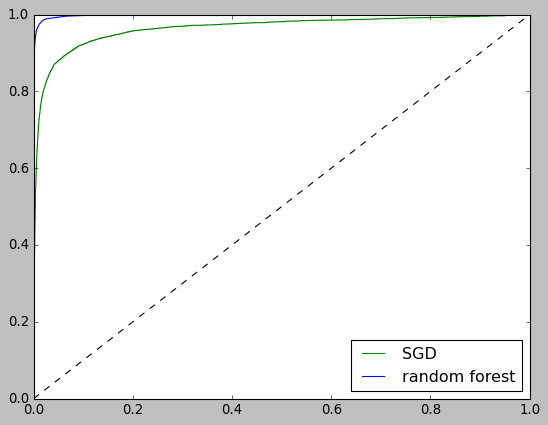

In [143]:
# Now lets plot an ROC curve for this too
FPR_forest, TPR_forest, THRESHOLD_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(FPR, TPR, 'g-',label= 'SGD')
plt.plot(FPR_forest, TPR_forest, 'b-',label='random forest')
plt.plot([0,1],[0,1],'k--')
plt.legend(loc="lower right")
plt.show()

In [142]:
roc_auc_score(y_train_5, y_scores_forest) # woahhhh, this seems like overfitting

0.998402186461512

# Multi-class Classifiers

In [144]:
sgd_classifier.fit(X_train, y_train) # One vs All strategy

SGDClassifier(random_state=42)

In [152]:
print(sgd_classifier.predict([X_train[2]]))
print(y_train[2])

[4]
4


In [156]:
print(sgd_classifier.decision_function([X_train[2]])) 
# scores achieved by each of the 10 under the hood binary classifiers

[[-34143.40703505 -21942.13780869  -4018.29275037  -2239.19313075
      43.09419826 -15058.88052383 -33653.31059893  -8277.80610963
   -7460.52016321 -14180.15338984]]


In [154]:
print(sgd_classifier.classes_)

[0 1 2 3 4 5 6 7 8 9]


In [157]:
from sklearn.multiclass import OneVsOneClassifier # One vs One strategy
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42)) 
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit]) # Hey the OvsA SGD classifier predicted this wrong

array([5])

In [158]:
# Random forest classifiers can directly sort data into multiple classes
forest_classifier.fit(X_train, y_train)
print(forest_classifier.predict([some_digit])) # It sorts 5 correctly toooo

array([5])

In [159]:
print(forest_classifier.predict_proba([some_digit]))

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [160]:
# Now les evaluate them 
cross_val_score(sgd_classifier, X_train, y_train, cv = 5, scoring='accuracy') # this takes real long to run 5-10mins
# cause it's building like 50 classifiers
# it's got 88% + accuracy

array([0.88083333, 0.88325   , 0.88116667, 0.86625   , 0.8875    ])

In [162]:
cross_val_score(forest_classifier, X_train, y_train, cv = 5, scoring = 'accuracy')
# WOAAAHHHHHHHHHHHHHHHHHHHHHHHHHHHH, nice

array([0.96808333, 0.96566667, 0.96541667, 0.962     , 0.97108333])

In [163]:
from sklearn.preprocessing import StandardScaler # how do I check distribution in this case ? normal or uniform
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(forest_classifier, X_train, y_train, cv = 5)

In [165]:
conf_final = confusion_matrix(y_train, y_train_pred)
conf_final

array([[5846,    2,    7,    2,    4,    6,   19,    1,   32,    4],
       [   1, 6636,   32,   16,   15,    4,    7,   15,   10,    6],
       [  24,   11, 5756,   30,   31,    2,   19,   39,   39,    7],
       [   8,    6,   84, 5815,    2,   66,    8,   53,   61,   28],
       [  12,   12,   11,    0, 5670,    0,   20,   11,   17,   89],
       [  25,    7,   11,   58,    9, 5210,   41,    5,   32,   23],
       [  25,   11,    1,    0,    8,   33, 5818,    0,   22,    0],
       [   4,   22,   64,    6,   41,    1,    1, 6044,   13,   69],
       [  11,   28,   35,   52,   26,   49,   25,    6, 5553,   66],
       [  24,   11,   16,   80,   70,   18,    4,   51,   36, 5639]])

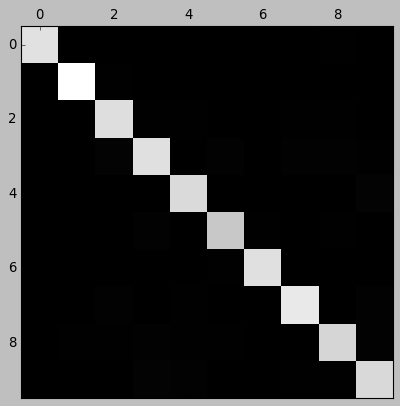

In [168]:
plt.matshow(conf_final, cmap='gray')
plt.show()

In [170]:
row_sums = conf_final.sum(axis = 1, keepdims = True)
normalised_conf_mx = conf_final/row_sums

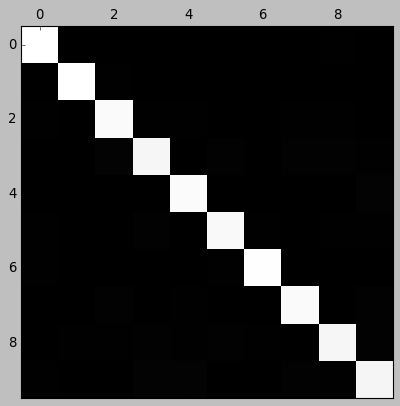

In [171]:
plt.matshow(normalised_conf_mx, cmap='gray')

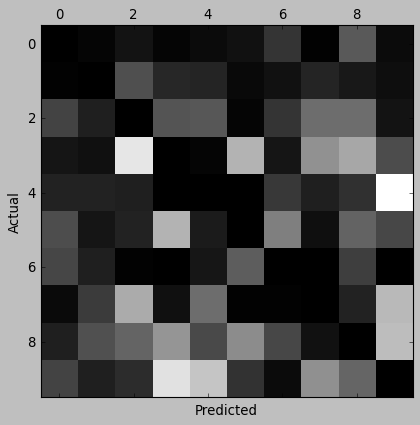

In [174]:
np.fill_diagonal(normalised_conf_mx, 0)
plt.matshow(normalised_conf_mx, cmap='gray')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [175]:
# 8 gets misclassified alot as other digits
# but fir bhi like a lot of digits don't get misclassified as 8

In [178]:
from sklearn.metrics import classification_report
report = classification_report(y_train, y_train_pred)

In [180]:
print(report) # That's pretty good

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5923
           1       0.98      0.98      0.98      6742
           2       0.96      0.97      0.96      5958
           3       0.96      0.95      0.95      6131
           4       0.96      0.97      0.97      5842
           5       0.97      0.96      0.96      5421
           6       0.98      0.98      0.98      5918
           7       0.97      0.96      0.97      6265
           8       0.95      0.95      0.95      5851
           9       0.95      0.95      0.95      5949

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



In [181]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [184]:
y_train_knn_pred = knn_classifier.predict(X_train)

In [185]:
print(classification_report(y_train, y_train_knn_pred))
# better than forest classifier

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.97      1.00      0.98      6742
           2       0.99      0.98      0.98      5958
           3       0.98      0.98      0.98      6131
           4       0.99      0.98      0.98      5842
           5       0.98      0.98      0.98      5421
           6       0.99      0.99      0.99      5918
           7       0.98      0.98      0.98      6265
           8       0.99      0.96      0.97      5851
           9       0.97      0.98      0.97      5949

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000



In [190]:
# now lets try it on the test set
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)

In [191]:
forest_classifier.fit(X_train, y_train)
forest_pred = forest_classifier.predict(X_test)

In [192]:
print('KNN results - ')
print(classification_report(y_test, knn_pred))
print('Forest predictions')
print(classification_report(y_test, forest_pred))

KNN results - 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Forest predictions
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97 